In [72]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pydotplus
from sklearn.tree import export_graphviz
from io import StringIO
import imageio
import graphviz
from sklearn import metrics
from sklearn import preprocessing
from IPython.display import Image

In [73]:
col_names  =  ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'
    ,'Credit_History','Property_Area','Loan_Status']
features_pruned=["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Credit_History","Property_Area"]
loan_dataset = pd .read_csv(r'E:\BUIC FILES\2nd sem\ML\traindata3.csv') # reading csv file from the given path
print('length of data = ',len(loan_dataset)) # show length or instances in data
print('shape of the data',loan_dataset.shape) # show instances and columns of data
loan_encoder = preprocessing.LabelEncoder()
loan_dataset['Gender'] = loan_encoder.fit_transform(loan_dataset['Gender'])
loan_dataset['Married'] = loan_encoder.fit_transform(loan_dataset['Married'])
loan_dataset['Education'] = loan_encoder.fit_transform(loan_dataset['Education'])
loan_dataset['Self_Employed'] = loan_encoder.fit_transform(loan_dataset['Self_Employed'])
loan_dataset['Property_Area'] = loan_encoder.fit_transform(loan_dataset['Property_Area'])
loan_dataset['Loan_Status'] = loan_encoder.fit_transform(loan_dataset['Loan_Status'])
feature_cols  = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
feature_variables = loan_dataset[feature_cols]
target_variable = loan_dataset.Loan_Status

X_train,X_test,y_train,y_test = train_test_split(feature_variables, target_variable, test_size=0.7,random_state=100)

tree_classifier = DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(X_train,y_train)

y_pred = tree_classifier.predict(X_test)


length of data =  614
shape of the data (614, 12)


In [93]:
acuracy_Of_Tree= metrics.accuracy_score(y_test, y_pred)
print("Accuracy of tree classifir:",acuracy_Of_Tree)

Accuracy of tree classifir: 0.7441860465116279


In [75]:
tree_classifier


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128,360,1,2,1
1,1,1,1,0,0,4583,1508.0,128,360,1,0,0
2,1,1,0,0,1,3000,0.0,66,360,1,2,1
3,1,1,0,1,0,2583,2358.0,120,360,1,2,1
4,1,0,0,0,0,6000,0.0,141,360,1,2,1


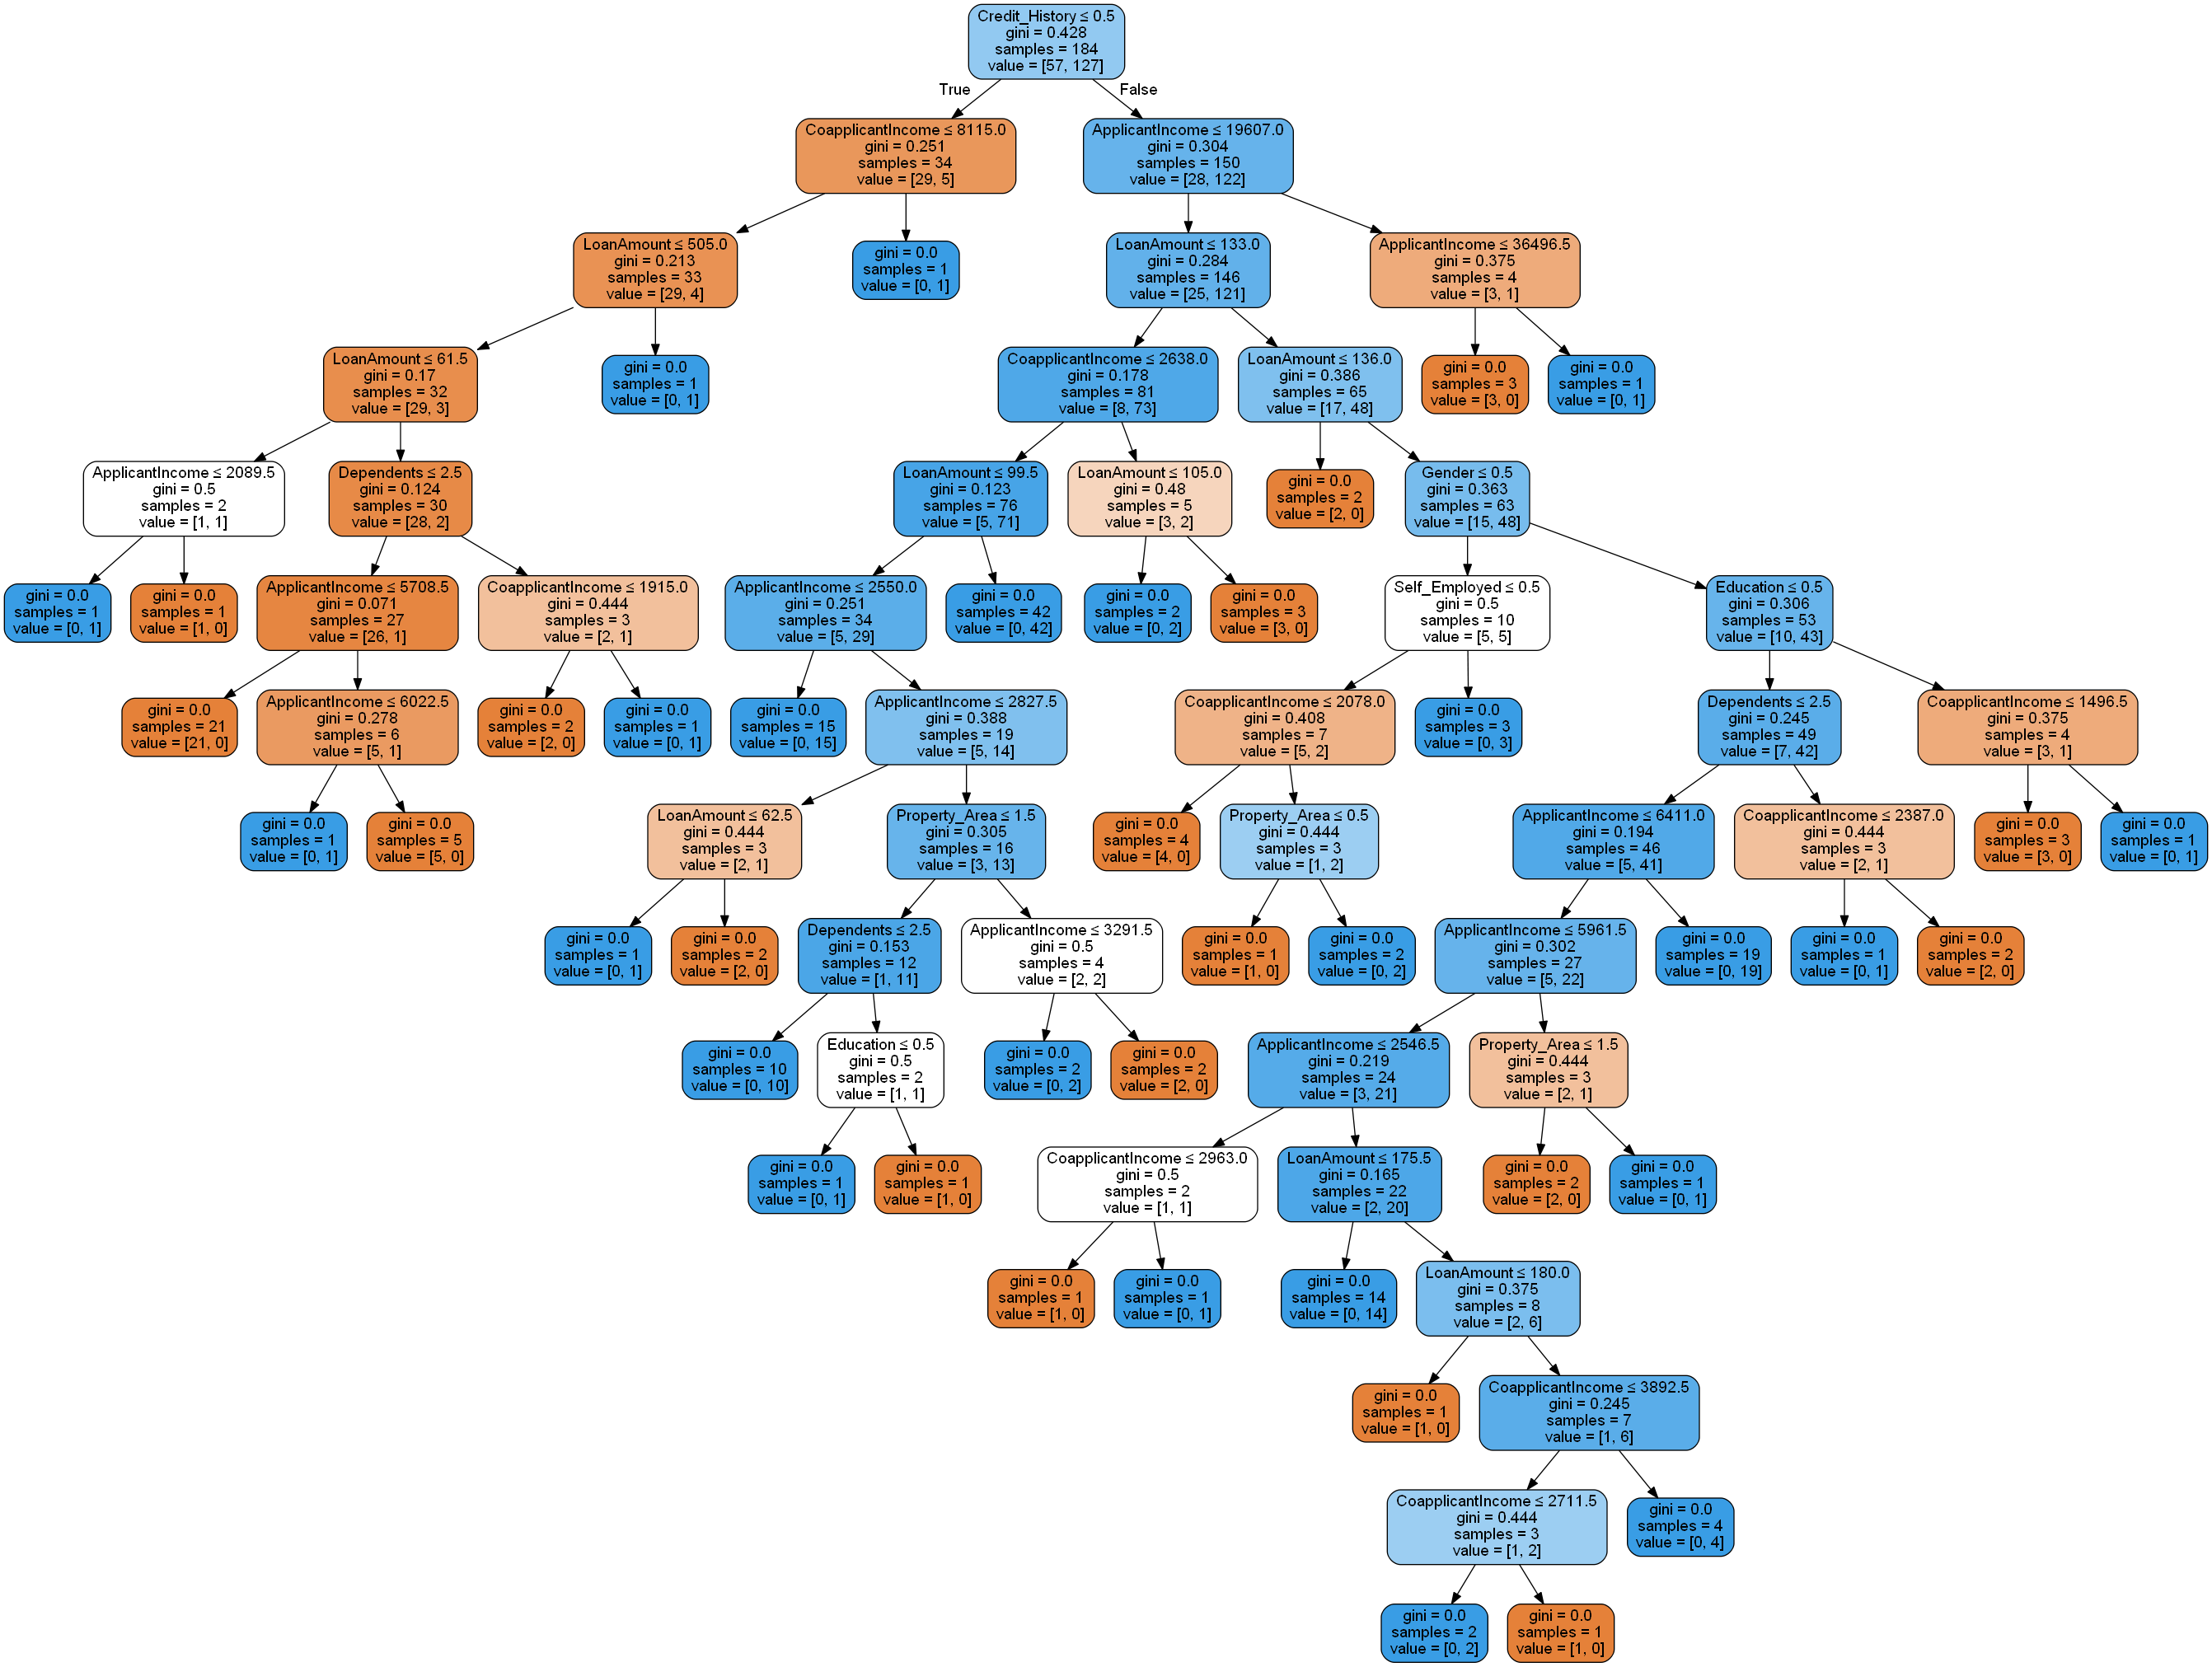

In [77]:
dot_data = StringIO()
export_graphviz(tree_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decisiontree.png')
Image(graph.create_png())

In [92]:
tree_classifier2 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
tree_classifier2 = tree_classifier2.fit(X_train,y_train)
y_pred = tree_classifier2.predict(X_test)
accuracy_With_Entropy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy with entropy = ', accuracy_With_Entropy)

Accuracy with entropy =  0.7441860465116279


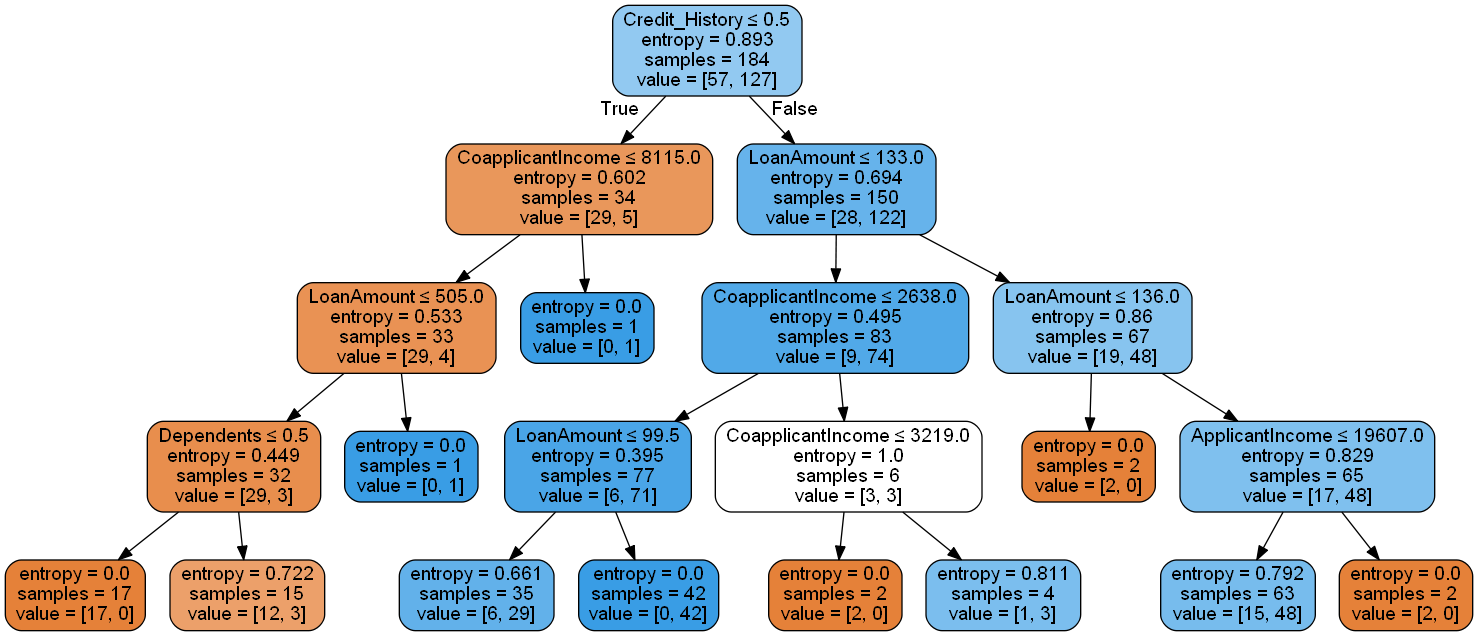

In [79]:
dot_data = StringIO()
export_graphviz(tree_classifier2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decisiontree_entropy.png')
Image(graph.create_png())

In [91]:
tree_classifier3 = DecisionTreeClassifier(criterion='gini',max_depth=None)
tree_classifier3 = tree_classifier3.fit(X_train,y_train)
y_pred = tree_classifier3.predict(X_test)
accuracy_With_Gini = metrics.accuracy_score(y_test,y_pred)
print('Accuracy with Gini = ', accuracy_With_Gini)

Accuracy with Gini =  0.6372093023255814


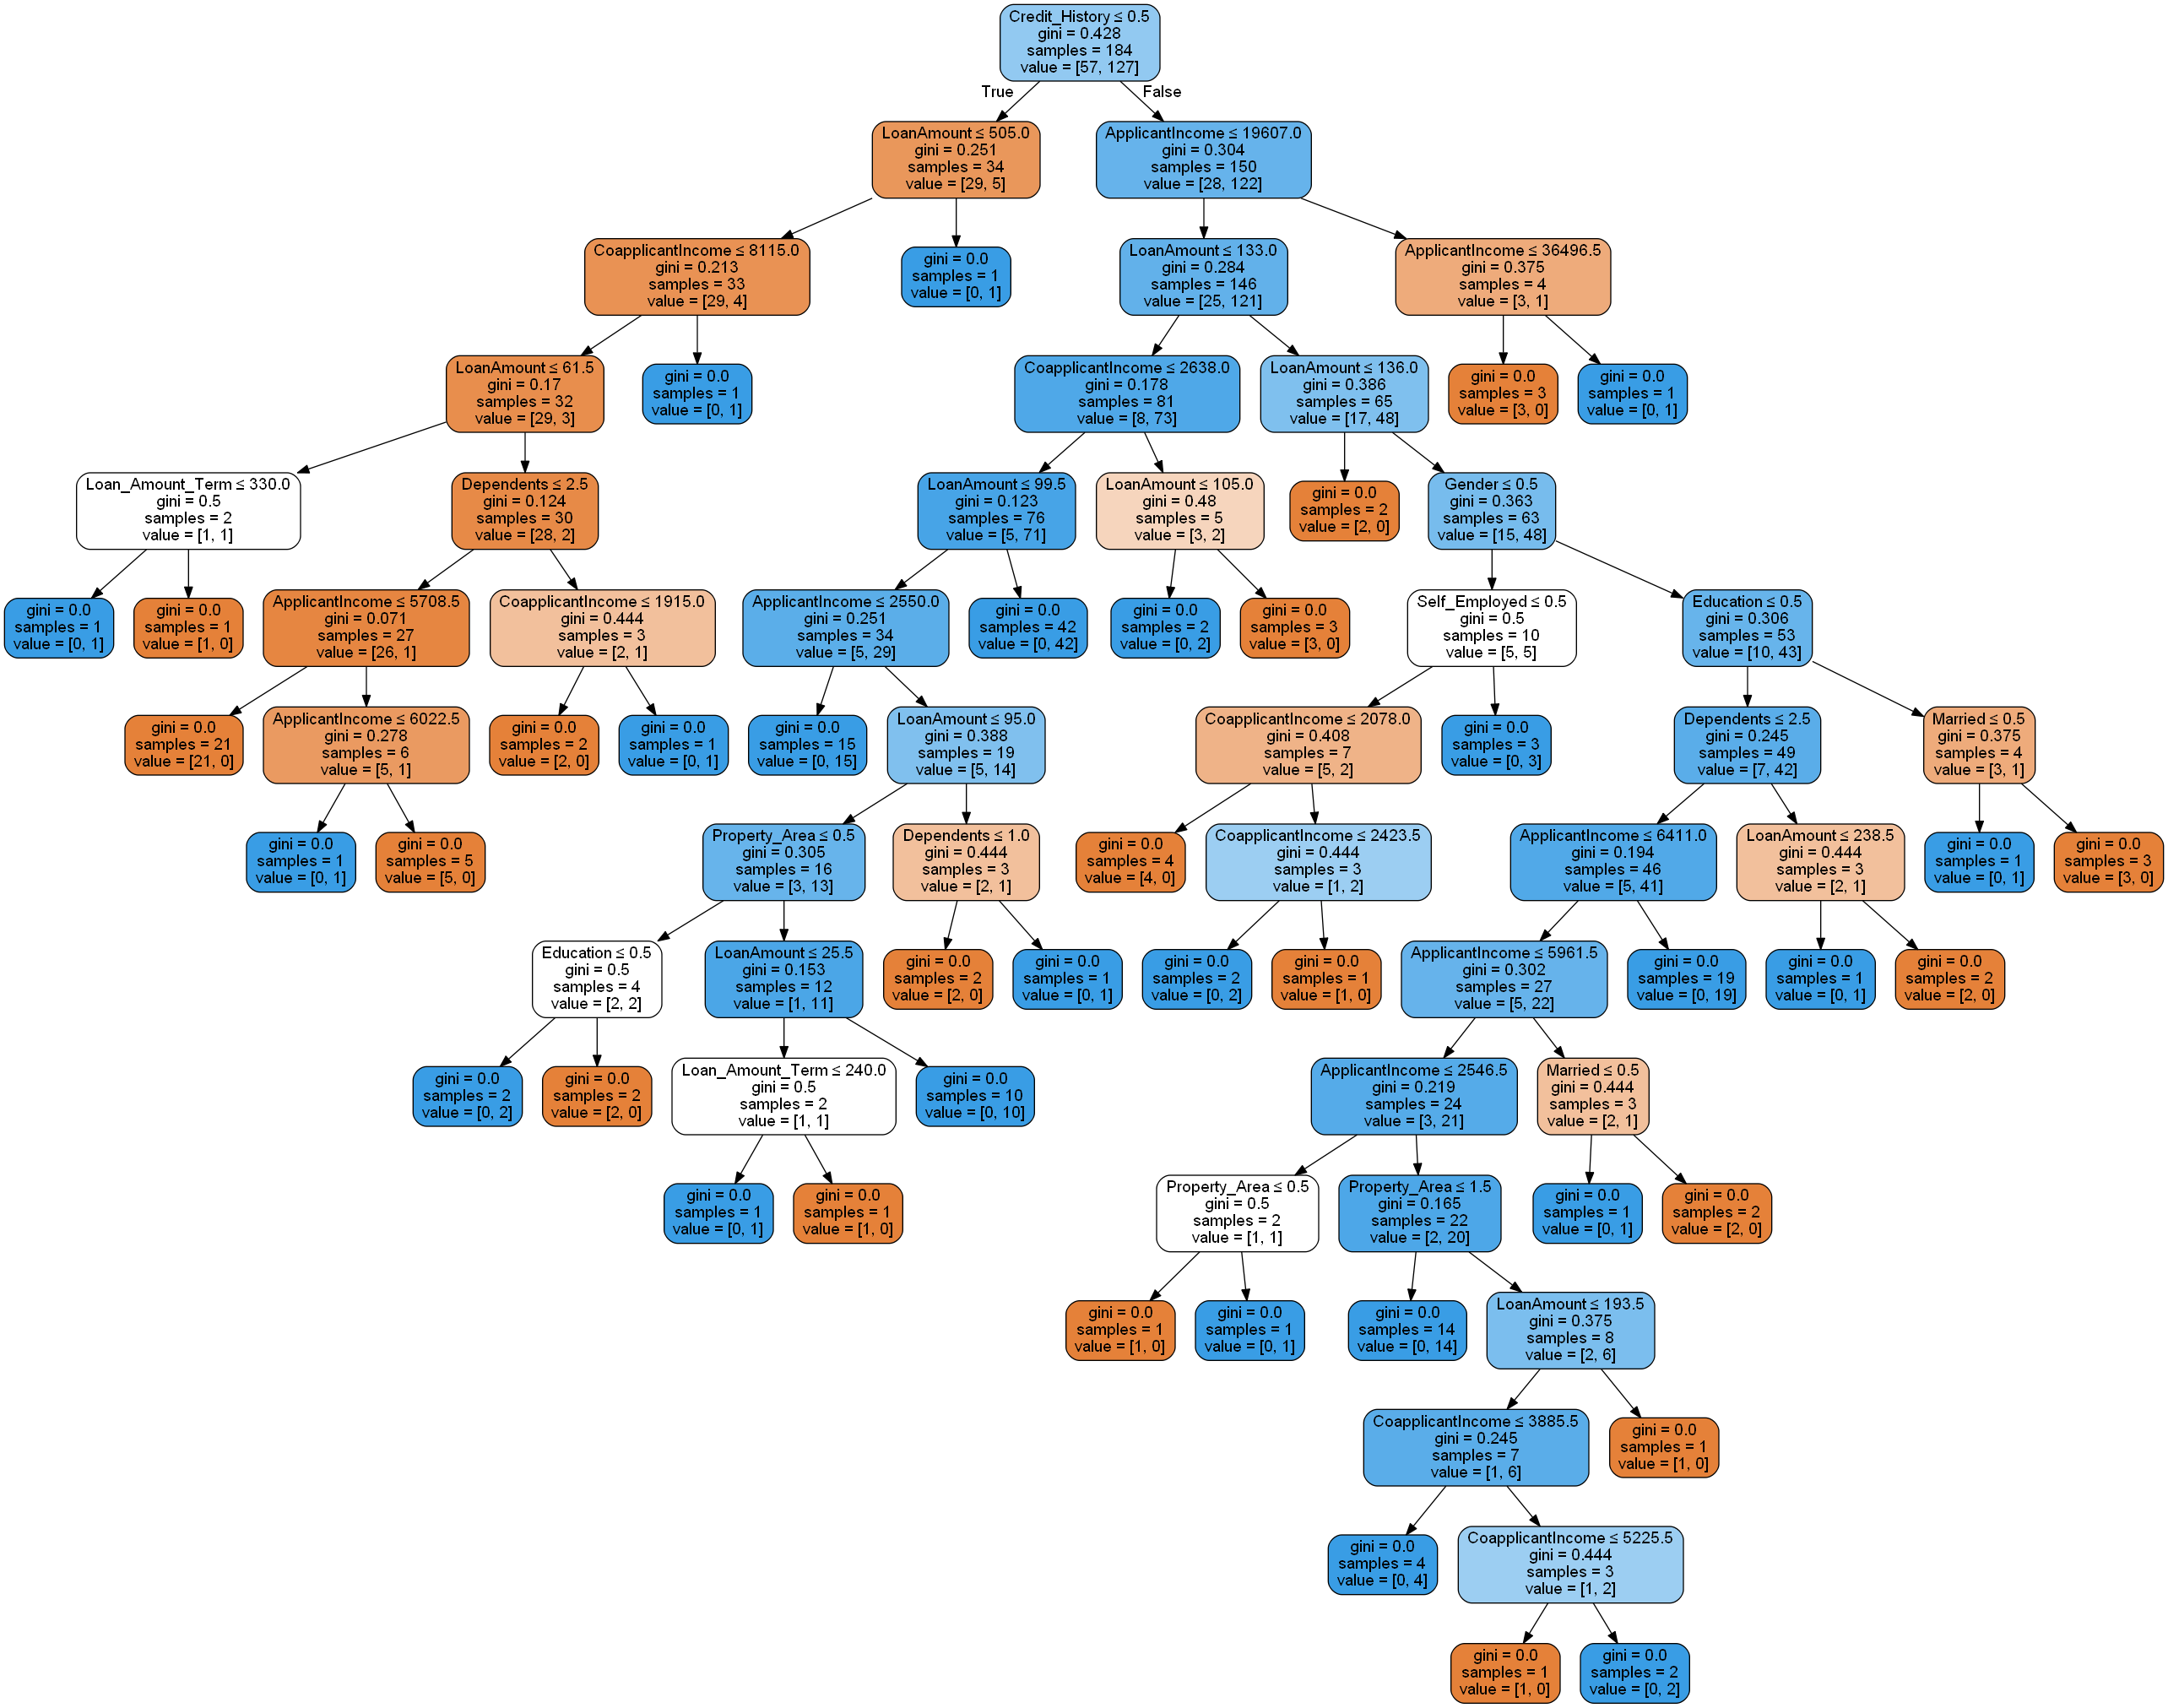

In [81]:
dot_data = StringIO()
export_graphviz(tree_classifier3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decisiontree_gini.png')
Image(graph.create_png())

In [88]:
feature_prune = loan_dataset[features_pruned]
label_prune = loan_dataset.Loan_Status
X_train1,X_test1,y_train1,y_test1 = train_test_split(feature_prune, label_prune, test_size=0.3,random_state=100)
tree_pruning = DecisionTreeClassifier()
tree_pruning = tree_pruning.fit(X_train1,y_train1)
y_pred = tree_pruning.predict(X_test1)

In [89]:
tree_pruning

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
accuracy_After_Pruning=metrics.accuracy_score(y_test1,y_pred)
print('Accuracy after pruning = ', accuracy_After_Pruning)

Accuracy after pruning with entropy =  0.6486486486486487


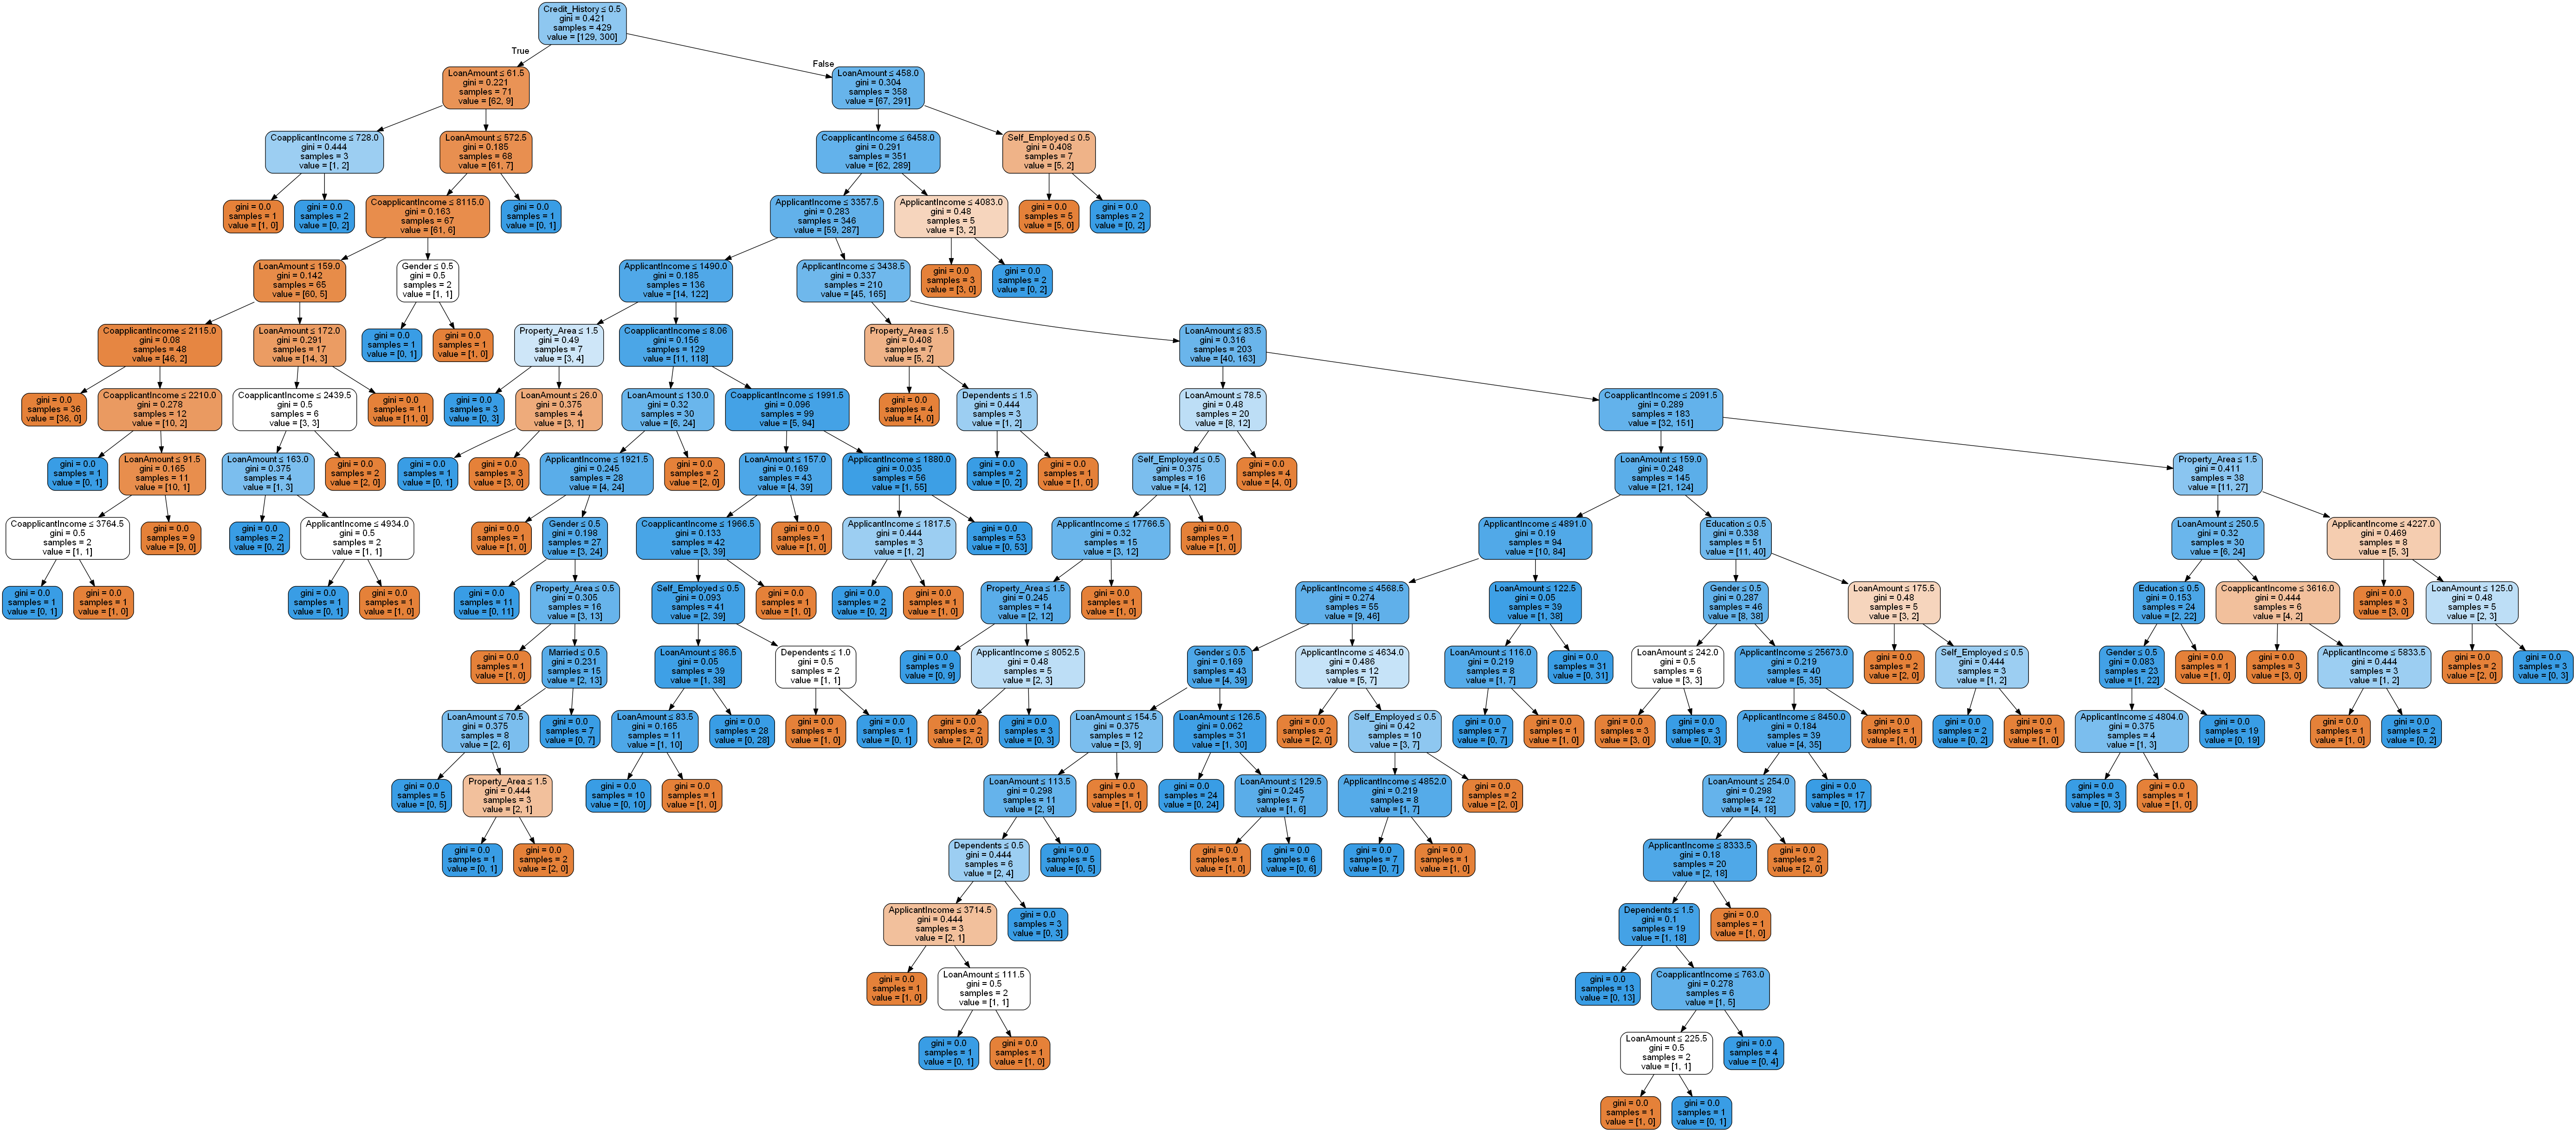

In [87]:
dot_data = StringIO()
export_graphviz(tree_pruning, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features_pruned)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decisiontree_gini.png')
Image(graph.create_png())

In [94]:
print("Accuracy of tree classifir:",acuracy_Of_Tree)
print('Accuracy with entropy = ', accuracy_With_Entropy)
print('Accuracy with Gini = ', accuracy_With_Gini)
print('Accuracy after pruning = ', accuracy_After_Pruning)

Accuracy of tree classifir: 0.7441860465116279
Accuracy with entropy =  0.7441860465116279
Accuracy with Gini =  0.6372093023255814
Accuracy after pruning =  0.6486486486486487
